In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# 머신러닝을 지원하는 sklearn 라이브러리 가져오기
from sklearn.neighbors import KNeighborsClassifier
# 평가 지표들을 활용할 수 있는 metrics 모듈을 불러오기
from sklearn import metrics
import tqdm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split#학습 평가 데이터 분리
import seaborn as sns #matplot과 유사하게 시각화 라이브러리이지만 좀 더 깔끔함
from sklearn.datasets import load_iris #붓꽃 iris
from sklearn.tree import DecisionTreeClassifier #트리
# !pip install seaborn
# 손쉽게 레이블 인코딩을 하기 위해 레이블인코더를 임포트
from sklearn.preprocessing import LabelEncoder
#!pip install graphviz #시각화 외부라이브러리
from sklearn.tree import export_graphviz
from sklearn.preprocessing import StandardScaler #StandardScaler
from sklearn.preprocessing import MinMaxScaler  #MinMaxScaler
from sklearn.datasets import load_breast_cancer
#!pip install jupyter_contrib_nbextensions && jupyter contrib nbextension install 목차보기
from sklearn.model_selection import cross_val_score#교차검증 적용을 위해 임포트
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier #앙상블 모델
from sklearn.ensemble import AdaBoostClassifier # 에이다
#!pip install xgboost #XG부스트
#!pip install lightgbm #LightGBM
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
# 빨간색 경고창 무시하기
import warnings
warnings.filterwarnings(action="ignore")
from sklearn.model_selection import train_test_split #트레인테스트 스플릿
from sklearn.model_selection import GridSearchCV # 그리드서치
from sklearn.model_selection import KFold # cv = kfold
from sklearn.datasets import make_classification

In [2]:
kfold = KFold(n_splits=10, random_state=123, shuffle=True) #cv 값 설정

In [3]:
train = pd.read_csv("data/train1.csv", index_col="ID") 
test = pd.read_csv("data/test1.csv", index_col="ID")

In [4]:
pd.reset_option("display")

In [5]:
train["Weight_in_gms"].describe()

count     6999
unique    3332
top          ?
freq       446
Name: Weight_in_gms, dtype: object

In [6]:
#plt.figure(figsize=(15, 5))
#sns.countplot(data = train,
#              x = "Cost_of_the_Product",
#              hue = "Reached.on.Time_Y.N"
#             );

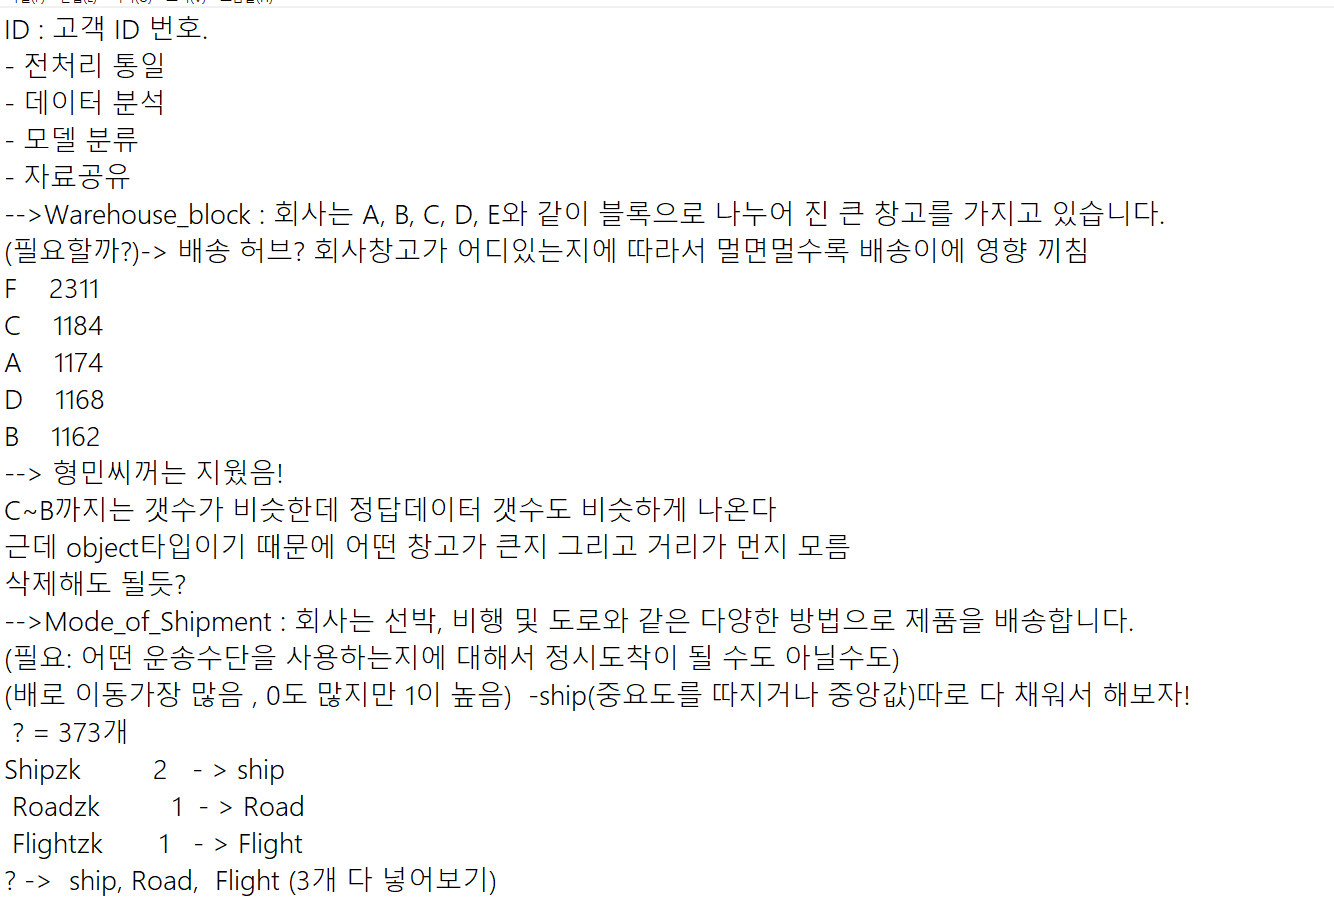

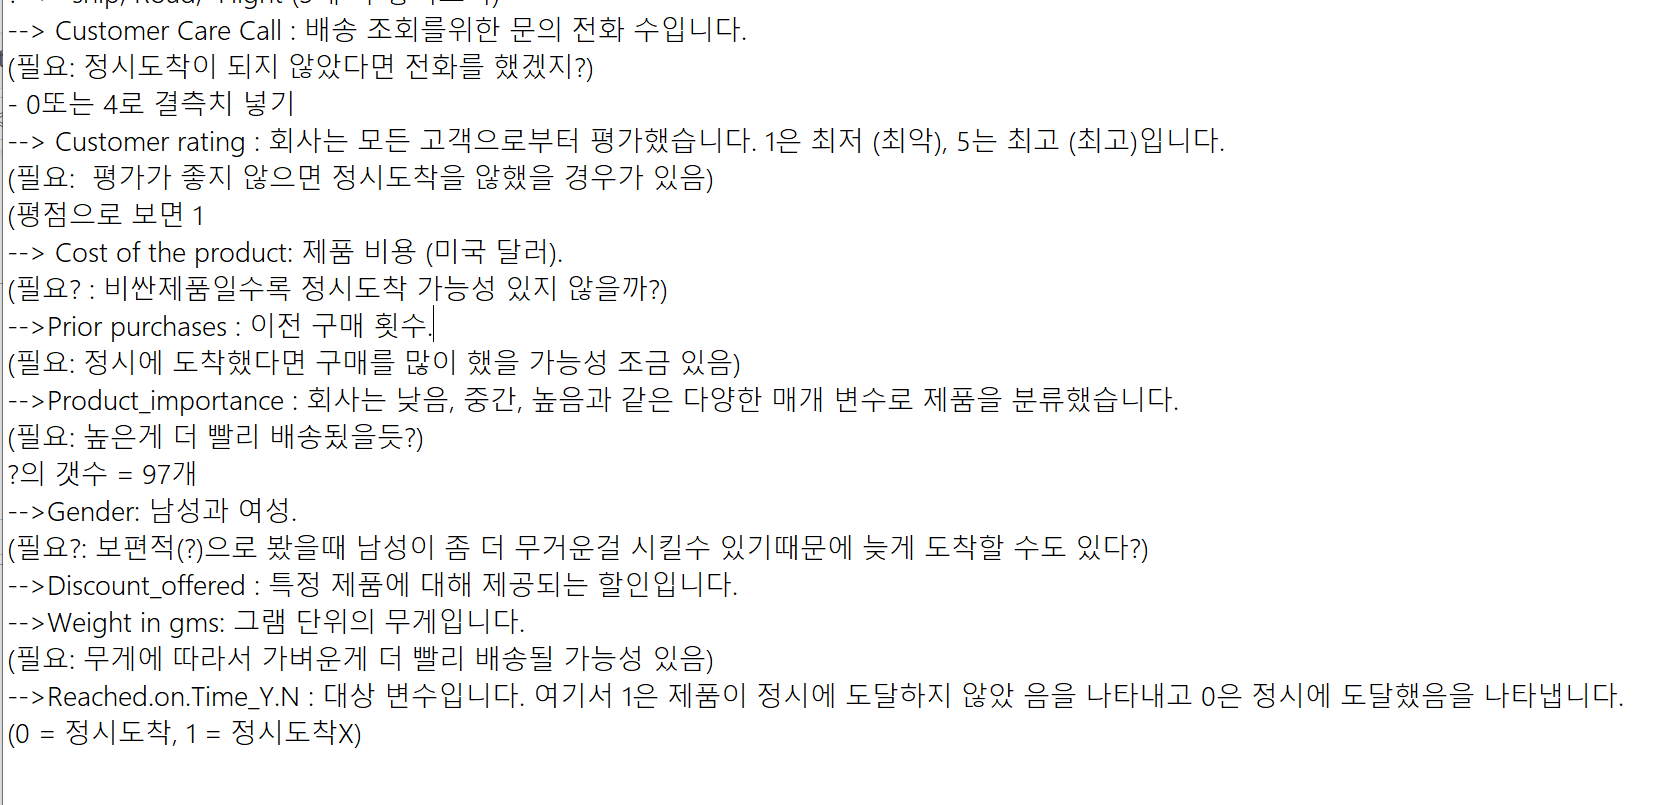

In [7]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 1 to 6999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      6999 non-null   object 
 1   Mode_of_Shipment     6999 non-null   object 
 2   Customer_care_calls  5423 non-null   float64
 3   Customer_rating      6999 non-null   int64  
 4   Cost_of_the_Product  6999 non-null   int64  
 5   Prior_purchases      6049 non-null   float64
 6   Product_importance   6999 non-null   object 
 7   Gender               6999 non-null   object 
 8   Discount_offered     3468 non-null   float64
 9   Weight_in_gms        6999 non-null   object 
 10  Reached.on.Time_Y.N  6999 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 656.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 7000 to 10999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------       

#### train널값
- : Customer_care_calls 1576
- : Prior_purchases 950
- : Discount_offered 3531
#### test널값
- : Customer_care_calls 856
- : Prior_purchases 367
- : Discount_offered 1915

## Discount_offered 0으로 결측치 채우기
- Discount_offered(특정 제품에 대해 제공되는 할인)



In [8]:
train["Prior_purchases"].value_counts()

3.0     2176
2.0     1423
4.0     1162
5.0      735
6.0      310
10.0     101
8.0       72
7.0       70
Name: Prior_purchases, dtype: int64

In [9]:
# Discount_offered 0으로 결측치 채우기
train["Discount_offered"] = train["Discount_offered"].fillna(0)
test["Discount_offered"] = test["Discount_offered"].fillna(0)

## Customer_care_calls 결측치 채우기
- 결측값을 Prior_purchases별 평균으로 대체하기
- Customer_care_calls(배송조회 문의)

In [10]:
test["Customer_care_calls"] = test["Customer_care_calls"].fillna(0,limit=428) #limit = 
test["Customer_care_calls"] = test["Customer_care_calls"].fillna(1)
train["Customer_care_calls"] = train["Customer_care_calls"].fillna(0,limit=788)
train["Customer_care_calls"] = train["Customer_care_calls"].fillna(1)
#test = test.fillna({'Discount_offered':int(test['Discount_offered'].mean())})
#train = train.fillna({'Discount_offered':int(train['Discount_offered'].mean())})

In [11]:
train["Customer_care_calls"].astype("int64")
test["Customer_care_calls"].astype("int64")

ID
7000     3
7001     3
7002     0
7003     0
7004     4
        ..
10995    4
10996    1
10997    1
10998    6
10999    5
Name: Customer_care_calls, Length: 4000, dtype: int64

In [12]:
test["Prior_purchases"] = test["Prior_purchases"].fillna(0,limit=183) #limit = 
test["Prior_purchases"] = test["Prior_purchases"].fillna(1)
train["Prior_purchases"] = train["Prior_purchases"].fillna(0,limit=25)
train["Prior_purchases"] = train["Prior_purchases"].fillna(1)

In [13]:
train["Prior_purchases"].astype("int64")
test["Prior_purchases"].astype("int64")

ID
7000     0
7001     2
7002     3
7003     4
7004     3
        ..
10995    4
10996    2
10997    2
10998    4
10999    5
Name: Prior_purchases, Length: 4000, dtype: int64

In [14]:
# fillna를 한번에 형변환과 평균값을 넣어주는 코드
# Prior_purchases = (이전 구매 횟수)

#test= test.fillna({'Customer_care_calls':int(test['Customer_care_calls'].mean()),
#           'Prior_purchases':int(test['Prior_purchases'].mean())
#          })
#train= train.fillna({'Customer_care_calls':int(train['Customer_care_calls'].mean()),
#           'Prior_purchases':int(train['Prior_purchases'].mean())
#          })

In [15]:
train["Prior_purchases"].astype("int64")
test["Prior_purchases"].astype("int64")

ID
7000     0
7001     2
7002     3
7003     4
7004     3
        ..
10995    4
10996    2
10997    2
10998    4
10999    5
Name: Prior_purchases, Length: 4000, dtype: int64

In [16]:
test.info()
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 7000 to 10999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      4000 non-null   object 
 1   Mode_of_Shipment     4000 non-null   object 
 2   Customer_care_calls  4000 non-null   float64
 3   Customer_rating      4000 non-null   int64  
 4   Cost_of_the_Product  4000 non-null   int64  
 5   Prior_purchases      4000 non-null   float64
 6   Product_importance   4000 non-null   object 
 7   Gender               4000 non-null   object 
 8   Discount_offered     4000 non-null   float64
 9   Weight_in_gms        4000 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 343.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 1 to 6999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_blo

In [17]:
# 상관관계
train.corr()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Reached.on.Time_Y.N
Customer_care_calls,1.000000,0.015436,0.033582,0.069799,-0.050440,-0.061148
Customer_rating,0.015436,1.000000,-0.001961,0.000197,-0.013318,0.011275
Cost_of_the_Product,0.033582,-0.001961,1.000000,0.029753,-0.028620,-0.012811
Prior_purchases,0.069799,0.000197,0.029753,1.000000,-0.037872,-0.040226
Discount_offered,-0.050440,-0.013318,-0.028620,-0.037872,1.000000,0.242017
Reached.on.Time_Y.N,-0.061148,0.011275,-0.012811,-0.040226,0.242017,1.000000


- 함수 사용해서 결측치 채우기

In [18]:
#def fill_min(data) :  # 매개변수 data에는 train 혹은 test가 들어가게 됨
    # 만약 calls컬럼이 결측치라면 피벗테이블에서 값을 가져올게요
#    if pd.isna(data["Customer_care_calls"]) :
        # 위 피벗테이블에서 만든 값을 리턴
#        return pt1.loc[data["Reached.on.Time_Y.N"], data["Discount_offered"]]
    # Age컬럼에 결측치가 아니라면 원래 나이값을 그대로 사용
#    else :
#        return data["Customer_care_calls"]

In [19]:
#train["Customer_care_calls"] = train.apply(fill_min, axis=1).astype("int64")

In [20]:
#test["Customer_care_calls"] = test.apply(fill_min, axis=1).astype("int64")

## Gender와 Reached.on.Time_Y.N 관계시각화
- 성별, 테스트데이터
- countplot : 데이터의 개수를 새어주는 차트

In [21]:
#plt.figure(figsize=(15, 5))
#sns.countplot(data = train,
#              x = "Weight_in_gms",
#              hue = "Reached.on.Time_Y.N"
#             );

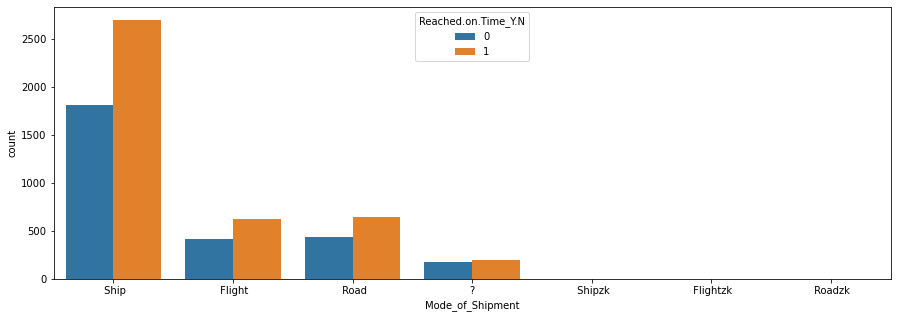

In [22]:
plt.figure(figsize=(15, 5))
sns.countplot(data = train,
              x = "Mode_of_Shipment",
              hue = "Reached.on.Time_Y.N"
             );

## Mode_of_Shipment 결측치 채우기
- ?를 빈도수가 높은 'ship'으로 채우기

In [23]:
# unique = 컬럼안의 유일한 값들만 뽑아줌
train["Mode_of_Shipment"].unique()

array([' Ship', ' Flight', ' Road', '?', ' Shipzk', ' Flightzk',
       ' Roadzk'], dtype=object)

In [24]:
test["Mode_of_Shipment"].unique()

array([' Ship', ' Flight', '?', ' Road', ' Shipzk', ' Roadzk'],
      dtype=object)

In [25]:
# ?값을 ship으로 채워줌
# replace("?"(이 값을), ' Ship(이것으로 바꿔주겠다)', inplace = True)
train["Mode_of_Shipment"].replace("?", ' Other', inplace = True) #Ship

In [26]:
test["Mode_of_Shipment"].replace("?", ' Other', inplace = True) #Ship

In [27]:
train["Mode_of_Shipment"]

ID
1          Ship
2        Flight
3          Ship
4          Ship
5        Flight
         ...   
6995       Ship
6996       Ship
6997       Ship
6998       Road
6999       Ship
Name: Mode_of_Shipment, Length: 6999, dtype: object

In [28]:
#    pd.set_option()	옵션 설정
# display.max_rows = 출력하는 최대 행의 개수
# display.max_columns =  출력하는 최대 칼럼의 개수

In [29]:
train["Customer_care_calls"].unique()

array([2., 5., 3., 0., 4., 6., 7., 1.])

In [30]:
#pd.set_option("display.max_columns", None)
#pd.set_option("display.max_rows", None)

In [31]:
train["Mode_of_Shipment"]

ID
1          Ship
2        Flight
3          Ship
4          Ship
5        Flight
         ...   
6995       Ship
6996       Ship
6997       Ship
6998       Road
6999       Ship
Name: Mode_of_Shipment, Length: 6999, dtype: object

## Customer_care_calls를 Prior_purchases과 <br> Mode_of_Shipment으로피벗테이블 시각화

In [32]:
pt1 = train.pivot_table(values="Customer_care_calls", # 데이터로 사용될 열(컬럼)을 지정
                        index = ["Prior_purchases", "Mode_of_Shipment"],#멀티인덱스 설정 
                        aggfunc="mean", # 데이터 요약시 사용하는 함수를 지정,mean, sum, count
                       )
pt1

Customer_care_calls
Prior_purchases Mode_of_Shipment                     
0.0              Flight                      3.400000
                 Other                       5.000000
                 Road                        4.333333
                 Ship                        3.250000
1.0              Flight                      3.151261
                 Other                       3.022727
                 Road                        3.273333
                 Ship                        3.274510
2.0              Flight                      2.995122
                 Other                       2.951807
                 Road                        3.133333
                 Ship                        2.867027
3.0              Flight                      3.145110
                 Other                       2.869565
                 Road                        3.178886
                 Roadzk                      4.000000
                 Ship                        3.022127
                 Shipzk                      0.000000
4.0              Flight                      3.835227
                 Flightzk                    2.000000
                 Other                       3.818182
                 Road                        3.737179
                 Ship                        3.775796
5.0              Flight                      3.789855
                 Other                       3.244898
                 Road                        3.396226
                 Ship                        3.625850
                 Shipzk                      4.000000
6.0              Flight                      3.104167
                 Other                       3.055556
                 Road                        3.790323
                 Ship                        3.483516
7.0              Flight                      3.100000
                 Other                       3.428571
                 Road                        3.153846
                 Ship                        3.475000
8.0              Flight                      3.444444
                 Other                       3.750000
                 Road                        3.000000
                 Ship                        3.106383
10.0             Flight                      2.750000
                 Other                       2.571429
                 Road                        2.368421
                 Ship                        3.079365

In [33]:
#plt.scatter(train["Weight_in_gms"][:, 0], train["Weight_in_gms"][:, 1], marker="o", c=y,
#            s=100, edgecolor="k", linewidth=1)
# plt.show()

In [34]:
#convert_weight = [1339, 1082, 4971, 4075, 2486, 1480, 1787, 5208, 1294, 4013] + [2500] * 6989
#convert_weight

In [35]:
#weight_dict = dict(zip(train["Weight_in_gms"], convert_weight))
#weight_dict

In [36]:
#plt.ylim
#sns.countplot(data = train,
#              x = "Weight_in_gms",
#              hue = "Reached.on.Time_Y.N"
#            );


In [37]:
#bins_size = [1001,2000,3000,4000,7500]
#labels_size = ["week", "normal", "fat" ,"many_fat", "very_fat"]
#train["weight_group"] = pd.cut(train["Weight_in_gms"], bins = bins_size, labels = labels_size)
#test["weight_group"] = pd.cut(train["Weight_in_gms"], bins = bins_size, labels = labels_size)

## Warehouse_block컬럼 지우기


In [38]:
#del train["Warehouse_block "]

In [39]:
#del test["Warehouse_block "]

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 1 to 6999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      6999 non-null   object 
 1   Mode_of_Shipment     6999 non-null   object 
 2   Customer_care_calls  6999 non-null   float64
 3   Customer_rating      6999 non-null   int64  
 4   Cost_of_the_Product  6999 non-null   int64  
 5   Prior_purchases      6999 non-null   float64
 6   Product_importance   6999 non-null   object 
 7   Gender               6999 non-null   object 
 8   Discount_offered     6999 non-null   float64
 9   Weight_in_gms        6999 non-null   object 
 10  Reached.on.Time_Y.N  6999 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 976.2+ KB


In [41]:
# value_counts = unique의 개수
train["Customer_care_calls"].value_counts

<bound method IndexOpsMixin.value_counts of ID
1       2.0
2       5.0
3       3.0
4       3.0
5       0.0
       ... 
6995    4.0
6996    3.0
6997    1.0
6998    3.0
6999    3.0
Name: Customer_care_calls, Length: 6999, dtype: float64>

## Weight_in_gms컬럼 결측치 채우기
- 물음표값만 뽑아서 그안에 3656(평균) 값 채워주기

In [42]:
# isin = 열이 list의 값들을 포함하고 있는 모든 행들을 골라낼 때 씀
# mask 변수에 Weight_in_gms 컬럼안에 ?값만 넣어줌
mask = train['Weight_in_gms'].isin(['?'])

In [43]:
# mask변수에 넣어둔 물음표 값 빼고 다 a라는 변수에 넣어서 출력
a = train[~mask]
a

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,
1,C,Ship,2.0,2,135,3.0,low,M,0.0,1339,1
2,F,Flight,5.0,3,225,5.0,low,F,6.0,1082,0
3,F,Ship,3.0,1,229,3.0,low,M,0.0,4971,1
4,F,Ship,3.0,2,228,0.0,medium,M,2.0,5640,0
5,D,Flight,0.0,1,195,6.0,high,F,0.0,4944,1
...,...,...,...,...,...,...,...,...,...,...,...
6995,D,Ship,4.0,2,232,5.0,medium,F,4.0,1783,0
6996,F,Ship,3.0,5,228,2.0,medium,F,0.0,5208,0
6997,D,Ship,1.0,1,300,5.0,low,F,10.0,1787,0


In [44]:
# a에 있는 Weight_in_gms 의 물음표 값을 제외한 값을 int값으로 타입을 변환해줌
a['Weight_in_gms']=a['Weight_in_gms'].astype('int64')

In [45]:
# 물음표 값을 평균값으로 넣어줌
train["Weight_in_gms"].replace("?", "7487", inplace= True)

In [46]:
test["Weight_in_gms"].replace("?", "7487", inplace= True)

In [47]:
test["Product_importance"]

ID
7000       high
7001     medium
7002        low
7003        low
7004        low
          ...  
10995         ?
10996    medium
10997    medium
10998       low
10999         ?
Name: Product_importance, Length: 4000, dtype: object

In [48]:
train["Weight_in_gms"]

ID
1       1339
2       1082
3       4971
4       5640
5       4944
        ... 
6995    1783
6996    5208
6997    1787
6998    4719
6999    5097
Name: Weight_in_gms, Length: 6999, dtype: object

In [49]:
test["Weight_in_gms"]

ID
7000     4352
7001     1056
7002     5383
7003     1880
7004     5174
         ... 
10995    1667
10996    3869
10997    4531
10998    1869
10999    1308
Name: Weight_in_gms, Length: 4000, dtype: object

In [50]:
#train["Warehouse_block "].astype("int64")

In [51]:
#웨어하우스
train["Warehouse_block "].describe()

count     6999
unique       5
top          F
freq      2311
Name: Warehouse_block , dtype: object

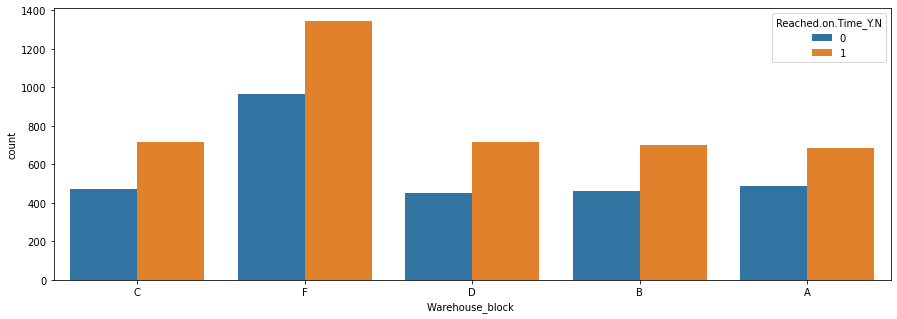

In [52]:
plt.figure(figsize=(15, 5))
sns.countplot(data = train,
              x = "Warehouse_block ",
              hue = "Reached.on.Time_Y.N"
            );

### 웨어하우스 블록이 별 관계가 없어보여서 C, F 나두고 나머지는 other로 묶어버리자잇!

In [53]:
ware = ["C", "F", "D", "B", "A"]
ware

['C', 'F', 'D', 'B', 'A']

In [54]:
convert_ware = ["C", "F"] + ["Other"] * 3
convert_ware

['C', 'F', 'Other', 'Other', 'Other']

In [55]:
ware_dict = dict(zip(ware, convert_ware))
ware_dict

{'C': 'C', 'F': 'F', 'D': 'Other', 'B': 'Other', 'A': 'Other'}

In [56]:
train["Warehouse_block "] = train["Warehouse_block "].map(ware_dict)

In [57]:
test["Warehouse_block "] = test["Warehouse_block "].map(ware_dict)

In [58]:
train["Warehouse_block "]

ID
1           C
2           F
3           F
4           F
5       Other
        ...  
6995    Other
6996        F
6997    Other
6998    Other
6999    Other
Name: Warehouse_block , Length: 6999, dtype: object

In [59]:
# train, test 둘다 int형 타입으로 변환!
train["Weight_in_gms"] = train["Weight_in_gms"].astype("int64")

In [60]:
test["Weight_in_gms"] = test["Weight_in_gms"].astype("int64")

In [61]:
#test["Weight_in_gms"]

In [62]:
a['Weight_in_gms'].describe()

count    6553.000000
mean     3656.793224
std      1637.365487
min      1001.000000
25%      1852.000000
50%      4189.000000
75%      5066.000000
max      7846.000000
Name: Weight_in_gms, dtype: float64

In [63]:
#Weight_in_gms 그룹으로 묶어주기
#bins_size = [1000, 1852, 4189, 7846]
#labels_size = ["Week", "Normal", "Fat"]
#train["Weight_group"] = pd.cut(train["Weight_in_gms"], bins = bins_size, labels = labels_size)

In [64]:
#test["Weight_group"] = pd.cut(test["Weight_in_gms"], bins = bins_size, labels = labels_size)

In [65]:
#test["Weight_group"]

In [66]:
#그룹으로 묶어줬으니 기존에 있던 Weight컬럼 지워버리자잇!
#test.drop("Weight_in_gms", axis=1, inplace= True)

In [67]:
#train.drop("Weight_in_gms", axis=1, inplace= True)

In [68]:
#train["Weight_group"]

In [69]:
#test["Weight_group"] #= test["Weight_group"].astype("int64")

In [70]:
#plt.figure(figsize=(15, 5))
#sns.countplot(data = train,
#              x = "Weight_group",
#              hue = "Reached.on.Time_Y.N"
#            );

In [71]:
#train["Weight_group"].unique()

## Product_importance결측치 채우기
- 물음표값을 medium로 채워줌
- mediumm, loww, highh를 medium, low, high로 채워주기

In [72]:
#train["Product_importance"].unique()
train["Product_importance"].describe()

count     6999
unique       7
top        low
freq      3344
Name: Product_importance, dtype: object

In [73]:
# 물음표값을 medium로 채워줌
train["Product_importance"].replace("?", "medium", inplace = True)

In [74]:
test["Product_importance"].replace("?", "medium", inplace = True)

In [75]:
# mediumm, loww, highh를 medium, low, high로 채워주기
train["Product_importance"].replace("mediumm", "medium", inplace=True)
test["Product_importance"].replace("mediumm", "medium", inplace=True)
#train["Product_importance"].replace("mediumm", "Other", inplace=True)
#test["Product_importance"].replace("mediumm", "Other", inplace=True)
train["Product_importance"].replace("loww", "low", inplace=True)
test["Product_importance"].replace("loww", "low", inplace=True)
#train["Product_importance"].replace("loww", "Other", inplace=True)
#test["Product_importance"].replace("loww", "Other", inplace=True)
train["Product_importance"].replace("highh", "high", inplace=True)
test["Product_importance"].replace("highh", "high", inplace=True)
#train["Product_importance"].replace("highh", "Other", inplace=True)
#test["Product_importance"].replace("highh", "Other", inplace=True)

In [76]:
train["Product_importance"].unique()

array(['low', 'medium', 'high'], dtype=object)

In [77]:
test["Product_importance"].unique()

array(['high', 'medium', 'low'], dtype=object)

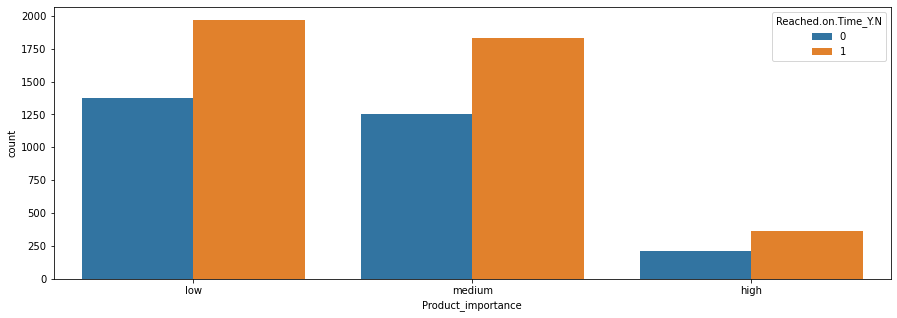

In [78]:
plt.figure(figsize=(15, 5))
sns.countplot(data = train,
              x = "Product_importance",
              hue = "Reached.on.Time_Y.N"
            );

In [79]:
#tmp = train["Product_importance"]

In [80]:
#train["Weight_group"].unique()

In [81]:
#test["Weight_group"].unique()

## Cost_of_the_Product의 유니크 값중 평균을 <br>높여주는 높은 값 9999를 다른값으로 바꿔주기
- Cost_of_the_Product(제품비용)

In [82]:
train["Cost_of_the_Product"].unique()

array([ 135,  225,  229,  228,  195,  171,  282,  161,  274,  222,  264,
        196,  232,  194,  207,  146,  221,  134,  254,  160,  273,  142,
        224,  253,  209,  247,  239,  215,  177,  189,  139,  184,  121,
        133,  158,  286,  281,  261,  214,  180,  169,  280,  166,  172,
        212,  246,  154,  203,  296,  185,  249,  269,  213,  263,  267,
        164,  178,  268,  278,  141,  140,  241,  105,  197,  193,  231,
        237,  305,  210,  138,  226,  151,  309,  255,  152,  186,  136,
        244,  252,  111,  248, 9999,  202,  174,  272,  182,  181,  173,
        242,  294,  198,  208,  301,  270,  130,  259,  236,  250,  223,
        183,  148,  243,  262,  201,  199,  156,  145,  150,  132,  137,
        276,  256,  290,  200,  258,  170,  227,  240,  157,  165,  175,
        233,  289,  191,  277,  275,  190,  163,  266,  206,  217,  220,
        219,  218,  187,  298,  162,  295,  234,  176,  245,  238,  143,
        265,  112,  125,  128,  102,   97,  204,  2

In [83]:
train["Cost_of_the_Product"].describe()

count    6999.000000
mean      214.249178
std       208.294273
min        96.000000
25%       169.000000
50%       214.000000
75%       251.000000
max      9999.000000
Name: Cost_of_the_Product, dtype: float64

In [84]:
# Cost_of_the_Product의 9999값을 135로 바꿔줌
train["Cost_of_the_Product"].replace(9999, 214, inplace= True)  #135

In [85]:
test["Cost_of_the_Product"].replace(9999, 214, inplace= True)   #135

In [86]:
train["Cost_of_the_Product"].describe()

count    6999.000000
mean      210.055008
std        48.220091
min        96.000000
25%       169.000000
50%       214.000000
75%       251.000000
max       310.000000
Name: Cost_of_the_Product, dtype: float64

In [87]:
# Cost_of_ther_Product 그룹으로 묶어주기
#bins_size = [0, 169, 220, 310]
#labels_size = ["a", "b", "c"]
#train["Cost_group"] = pd.cut(train["Cost_of_the_Product"], bins = bins_size, labels = labels_size)


In [88]:
#test["Cost_group"] = pd.cut(test["Cost_of_the_Product"], bins = bins_size, labels = labels_size)

In [89]:
#train.drop("Cost_of_the_Product", axis=1, inplace=True)

In [90]:
#test.drop("Cost_of_the_Product", axis=1, inplace=True)

In [91]:
#train["Cost_group"]

In [92]:
#test["Cost_group"]

In [93]:
#plt.figure(figsize=(15, 5))
#sns.countplot(data = train,
#              x = "Cost_group",
 #             hue = "Reached.on.Time_Y.N"
#             );

In [94]:
#test["Weight_in_gms"]

## Mode_of_Shipment의 유니크값 3개  바꿔주기
- Shipzk, Flightzk, Roadzk -> Ship, Flight, Road로 바꾸기

In [95]:
train["Mode_of_Shipment"].unique()

array([' Ship', ' Flight', ' Road', ' Other', ' Shipzk', ' Flightzk',
       ' Roadzk'], dtype=object)

In [96]:
# Shipzk, Flightzk, Roadzk -> Ship, Flight, Road로 바꾸기
train["Mode_of_Shipment"].replace(' Flightzk', ' Flight', inplace=True)
test["Mode_of_Shipment"].replace(' Flightzk', ' Flight', inplace=True)
train["Mode_of_Shipment"].replace(' Shipzk', ' Ship', inplace=True)
test["Mode_of_Shipment"].replace(' Shipzk', ' Ship', inplace=True)
train["Mode_of_Shipment"].replace(' Roadzk', ' Road', inplace=True)
test["Mode_of_Shipment"].replace(' Roadzk', ' Road', inplace=True)

In [97]:
train["Mode_of_Shipment"].unique()

array([' Ship', ' Flight', ' Road', ' Other'], dtype=object)

In [98]:
mode = [' Ship', ' Flight', ' Road', ' Other']
mode
convert_mode = [' Ship']+ [' Other']*3
convert_mode
mode_dict = dict(zip(mode, convert_mode))
mode_dict
train["Mode_of_Shipment"] = train["Mode_of_Shipment"].map(mode_dict)
test["Mode_of_Shipment"] = test["Mode_of_Shipment"].map(mode_dict)

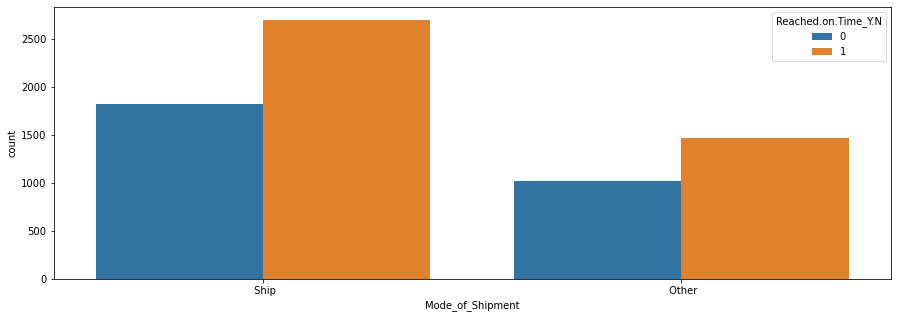

In [99]:
plt.figure(figsize=(15, 5))
sns.countplot(data = train,
              x = "Mode_of_Shipment",
              hue = "Reached.on.Time_Y.N"
             );

## 필요없는 컬럼 삭제하기
- axis=1 : 컬럼
- axis=: 열(인덱스)

In [100]:
#train.drop("Gender", axis=1, inplace= True)

In [101]:
#test.drop("Gender", axis=1, inplace= True)

In [102]:
#train.drop("Cost_group", axis=1, inplace= True)

In [103]:
#test.drop("Cost_group", axis=1, inplace= True)

In [104]:
#train.drop("Customer_rating", axis=1, inplace= True)

In [105]:
#test.drop("Customer_rating", axis=1, inplace= True)

In [106]:
#train.drop("Weight_in_gms", axis=1, inplace= True)

In [107]:
#test.drop("Weight_in_gms", axis=1, inplace= True)

In [108]:
#train.drop("Discount_offered", axis=1, inplace= True)

In [109]:
#test.drop("Discount_offered", axis=1, inplace= True)

In [110]:
#train.drop("Pri", axis=1, inplace= True)

In [111]:
#test.drop("Cost_of_the_Product", axis=1, inplace= True)

### 모델링(데이터가공, 모델 선택, 학습 , 평가)
- 문제와 정답 데이터로 분리

In [112]:
# train데이터에서 정답 컬럼
y_train = train["Reached.on.Time_Y.N"]
# train데이터에서 정답 컬럼을 삭제한 후 남은 모든 컬럼들
X_train = train.drop("Reached.on.Time_Y.N", axis = 1)
# 맨 처음에 받았던 test.csv
X_test = test

In [113]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(6999, 10)
(4000, 10)
(6999,)


In [114]:
train["Customer_rating"] = train["Customer_rating"].astype("int64")

In [115]:
test["Customer_rating"] = test["Customer_rating"].astype("int64")

In [116]:
#train['Weight_group'].astype('float64')

In [117]:
#test['Weight_group'].astype('float64')

In [118]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 1 to 6999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      6999 non-null   object 
 1   Mode_of_Shipment     6999 non-null   object 
 2   Customer_care_calls  6999 non-null   float64
 3   Customer_rating      6999 non-null   int64  
 4   Cost_of_the_Product  6999 non-null   int64  
 5   Prior_purchases      6999 non-null   float64
 6   Product_importance   6999 non-null   object 
 7   Gender               6999 non-null   object 
 8   Discount_offered     6999 non-null   float64
 9   Weight_in_gms        6999 non-null   int64  
 10  Reached.on.Time_Y.N  6999 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 976.2+ KB


## 원 핫 인코딩
- object를 int로 변환시켜주기

In [119]:
# 원 핫 인코딩
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [120]:
print(X_test.shape)
print(X_train.shape)

(4000, 16)
(6999, 16)


In [121]:
# set 명령을 활용하여 일일이 찾지 않고 바로 어떤 컬럼이 다른지 확인 가능
# set: 중복이 없는 요소들 (unique)로만 구성된 집합


In [122]:
# 중복없는 요소가 없다는걸 확인할 수 있다
set(X_train.columns) -set(X_test.columns)

set()

In [123]:
set(X_test.columns) -set(X_train.columns)

set()

In [124]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 1 to 6999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer_care_calls        6999 non-null   float64
 1   Customer_rating            6999 non-null   int64  
 2   Cost_of_the_Product        6999 non-null   int64  
 3   Prior_purchases            6999 non-null   float64
 4   Discount_offered           6999 non-null   float64
 5   Weight_in_gms              6999 non-null   int64  
 6   Warehouse_block _C         6999 non-null   uint8  
 7   Warehouse_block _F         6999 non-null   uint8  
 8   Warehouse_block _Other     6999 non-null   uint8  
 9   Mode_of_Shipment_ Other    6999 non-null   uint8  
 10  Mode_of_Shipment_ Ship     6999 non-null   uint8  
 11  Product_importance_high    6999 non-null   uint8  
 12  Product_importance_low     6999 non-null   uint8  
 13  Product_importance_medium  6999 non-null   uint8

In [125]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 7000 to 10999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer_care_calls        4000 non-null   float64
 1   Customer_rating            4000 non-null   int64  
 2   Cost_of_the_Product        4000 non-null   int64  
 3   Prior_purchases            4000 non-null   float64
 4   Discount_offered           4000 non-null   float64
 5   Weight_in_gms              4000 non-null   int64  
 6   Warehouse_block _C         4000 non-null   uint8  
 7   Warehouse_block _F         4000 non-null   uint8  
 8   Warehouse_block _Other     4000 non-null   uint8  
 9   Mode_of_Shipment_ Other    4000 non-null   uint8  
 10  Mode_of_Shipment_ Ship     4000 non-null   uint8  
 11  Product_importance_high    4000 non-null   uint8  
 12  Product_importance_low     4000 non-null   uint8  
 13  Product_importance_medium  4000 non-null   u

In [126]:
X_train["Customer_care_calls"].value_counts()

4.0    1756
3.0    1620
5.0    1147
1.0     788
0.0     788
6.0     496
2.0     287
7.0     117
Name: Customer_care_calls, dtype: int64

In [127]:
#train["Mode_of_Shipment_ Flightzk"]
#X_train['Mode_of_Shipment_ Flightzk'] = 1
#X_train['Product_importance_highh'] = 1
#X_train['Product_importance_loww'] = 1
#X_test['Mode_of_Shipment_ Flightzk'] = 0
#X_test['Product_importance_highh'] = 0
#X_test['Product_importance_loww'] = 0
X_train.columns

Index(['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms',
       'Warehouse_block _C', 'Warehouse_block _F', 'Warehouse_block _Other',
       'Mode_of_Shipment_ Other', 'Mode_of_Shipment_ Ship',
       'Product_importance_high', 'Product_importance_low',
       'Product_importance_medium', 'Gender_F', 'Gender_M'],
      dtype='object')

In [128]:
X_test.columns

Index(['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms',
       'Warehouse_block _C', 'Warehouse_block _F', 'Warehouse_block _Other',
       'Mode_of_Shipment_ Other', 'Mode_of_Shipment_ Ship',
       'Product_importance_high', 'Product_importance_low',
       'Product_importance_medium', 'Gender_F', 'Gender_M'],
      dtype='object')

## 앙상블

### DecisionTree모델 활용

In [129]:
param_knn = {"n_neighbors": range(1, 10)} 

In [130]:
#grid_search_knn = GridSearchCV(KNeighborsClassifier(), # 모델
#                               param_knn,              # 파라미터 및 범위
#                               cv= 10                    # 교차검증 수
#                              )
#grid_search_knn.fit(X_train, y_train)

In [131]:
#print("최적 파라미터 값 : ", grid_search_knn.best_params_)
#print("최고 교차 검증 점수: ", grid_search_knn.best_score_)
#print("최고 성능 모델: ", grid_search_knn.best_estimator_)

In [132]:
knn_md = KNeighborsClassifier(n_neighbors=6)

In [133]:
scaler = StandardScaler()

In [134]:
result_knn_train = scaler.fit_transform(X_train)

In [135]:
result_knn = cross_val_score(knn_md,
                             X_train,
                             y_train,
                             cv = kfold  #8
                            )
result_knn.mean()

0.6543809523809523

In [136]:
tree_md = DecisionTreeClassifier(max_depth=6, max_leaf_nodes=11,
                       min_samples_leaf=71, random_state=1) # 6 , 11 ,71 :max_depth=16, max_features=13, max_leaf_nodes=16,
                       #min_samples_leaf=81

In [137]:
#tree_md.fit(X_train,y_train)

In [138]:
result_DT = cross_val_score(tree_md, # 위에서 만든 모델
                            X_train, # 학습용 문제 데이터
                            y_train, # 학습용 정답 데이터
                           # scoring="f1",
                            cv = kfold# cv = 나눌개수   8
                           )
result_DT.mean()

0.6779513590844063

In [139]:
param_tree = {"max_depth" : [2, 4, 6, 8, 10, 12],
              "max_leaf_nodes" : range(1, 50, 5),
              "min_samples_leaf" : range(1, 100, 10),
            "random_state": range(1, 100, 10)
           }

In [140]:
#grid_search_tree = GridSearchCV(DecisionTreeClassifier(), # 모델
#                               param_tree,              # 파라미터 및 범위
#                               cv= kfold                    # 교차검증 수
#                                 )
#grid_search_tree.fit(X_train, y_train)

In [141]:
#print("최적 파라미터 값 : ", grid_search_tree.best_params_)
#print("최고 교차 검증 점수: ", grid_search_tree.best_score_)
#print("최고 성능 모델: ", grid_search_tree.best_estimator_)

### 에이다부스팅 모델활용

In [142]:
ada_md = AdaBoostClassifier(n_estimators=25, random_state=1)

In [143]:
result_ada = cross_val_score(ada_md,
                             X_train,
                             y_train,
                             #scoring="f1",
                             cv = kfold
                            )
result_ada.mean()

0.6543813611281422

In [144]:
param_ada =  { "random_state" : range(1, 100, 5)             
             }

In [145]:
#grid_search_ada = GridSearchCV(AdaBoostClassifier(), # 모델
#                                param_ada,              # 파라미터 및 범위
#                               cv= 10                    # 교차검증 수
#                              )
#grid_search_ada.fit(X_train, y_train)

In [146]:
#print("최적 파라미터 값 : ", grid_search_ada.best_params_)
#print("최고 교차 검증 점수: ", grid_search_ada.best_score_)
#print("최고 성능 모델: ", grid_search_ada.best_estimator_)

### xg부스팅 모델 활용

In [147]:
xg_md = XGBClassifier(n_estimators=100,random_state=1, learning_rate = 0.01, max_depth = 6)    # 200, 1, 0.01, 41

In [148]:
result_xg = cross_val_score(xg_md,
                                X_train,
                                y_train,
                               #scoring="f1",
                                cv= kfold                            
                               )
result_xg.mean()

[21:59:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:59:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:59:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:59:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

0.6798105456774984

In [149]:

#param_xg = { #range(1, 30, 5)
#              "random_state" : range(1, 100, 5), # range(1, 100, 5)
 #           "learning_rate" : [0.01, 0.05, 0.1, 0.15, 0.2],
 #           "max_depth" : range(4, 16, 2)
#            }

In [150]:
#grid_search_xg = GridSearchCV(XGBClassifier(), # 모델
#                             param_xg,              # 파라미터 및 범위
#                              cv= kfold                 # 교차검증 수
#                             )
#grid_search_xg.fit(X_train, y_train)

In [151]:
#print("최적 파라미터 값 : ", grid_search_xg.best_params_)
#print("최고 교차 검증 점수: ", grid_search_xg.best_score_)
#print("최고 성능 모델: ", grid_search_xg.best_estimator_)

### 랜덤포레스트

In [152]:
#forest_md = RandomForestClassifier(  n_estimators=100, random_state=1,max_depth=6,)
#forest_md


In [153]:
#result_RF = cross_val_score(forest_md, # 위에서 만든 모델
#                            X_train, # 학습용 문제 데이터
#                            y_train, # 학습용 정답 데이터
#                            cv = kfold # cv = 나눌개수
#                           )
#result_RF.mean()    

In [154]:
# grid
#param_rf = {"n_estimators" : [100, 200, 300, 400, 500],
#              "random_state" : range(1, 100, 5), 
#              "max_depth" : range(1, 15, 5)
#              
#            }

In [155]:
#grid_search_rf = GridSearchCV(LGBMClassifier(), # 모델
#                                param_rf,              # 파라미터 및 범위
 #                              cv= kfold                   # 교차검증 수
#                              )
#grid_search_rf.fit(X_train, y_train)

In [156]:
#print("최적 파라미터 값 : ", grid_search_rf.best_params_)
#print("최고 교차 검증 점수: ", grid_search_rf.best_score_)
#print("최고 성능 모델: ", grid_search_rf.best_estimator_)

### LightGBM 모델 활용

In [157]:
lgb_md = LGBMClassifier(n_estimators=150, random_state=1,max_depth=6 ,learning_rate=0.05)  #25, 40

In [158]:
result_lgb = cross_val_score(lgb_md,
                                X_train,
                                y_train,
                                #scoring = "f1",
                                cv= kfold #50
                               )
result_lgb.mean()

0.6645240138974045

In [159]:
# grid
#param_lgb = {"learning_rate" : [0.01, 0.05, 0.1, 0.15, 0.2],
#              "random_state" : range(1, 100, 5), 
 #             "max_depth" : range(1, 15, 5)
 #            }

In [160]:
#grid_search_lgb = GridSearchCV(LGBMClassifier(), # 모델
#                                param_lgb,              # 파라미터 및 범위
#                               cv= kfold                   # 교차검증 수
#                              )
#grid_search_lgb.fit(X_train, y_train)

In [161]:
#print("최적 파라미터 값 : ", grid_search_lgb.best_params_)
#print("최고 교차 검증 점수: ", grid_search_lgb.best_score_)
#print("최고 성능 모델: ", grid_search_lgb.best_estimator_)

In [162]:
voting_md = VotingClassifier(estimators=[                                   
                                 ("xg1", xg_md),
                                 ("tree1", tree_md)
                                 #("lgb1", lgb_md)
                                  ],
                                  voting="soft"  #soft, hard
                               )

In [163]:
result_vo = cross_val_score(voting_md,
                                X_train, 
                                y_train,           # 정답 데이터
                                #scoring="f1",
                                cv = kfold
                               )
result_vo.mean()

[21:59:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:59:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:59:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:59:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

0.6778095238095239

In [168]:
result_submission = pd.read_csv("data/sampleSubmission.csv")
result_submission

,ID,Reached.on.Time_Y.N
0,7000,NaN
1,7001,NaN
2,7002,NaN
3,7003,NaN
4,7004,NaN
...,...,...
3995,10995,NaN
3996,10996,NaN
3997,10997,NaN
3998,10998,NaN


In [169]:
voting_md.fit(X_train, y_train) 
pre = voting_md.predict(X_test)   
pre

[22:09:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [170]:
result_submission["Reached.on.Time_Y.N"] = pre

In [171]:
result_submission.to_csv("sampleSubmission_q_vo.csv", index=False)